In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error


In [60]:
df = pd.read_csv("local_weather_electricity_usage_dataset_2025.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (365, 7)


,date,temperature_celsius,humidity_percent,electricity_units_kwh,household_size,ac_usage_hours,city
0,2025-01-01,15.62,73.92,26.52,6,1.90,Delhi
1,2025-01-02,16.69,57.55,22.31,6,0.20,Delhi
2,2025-01-03,20.62,88.19,23.49,5,0.04,Delhi
3,2025-01-04,10.01,67.05,20.61,3,1.98,Delhi
4,2025-01-05,16.48,66.71,12.32,3,0.58,Delhi


In [61]:
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   365 non-null    str    
 1   temperature_celsius    365 non-null    float64
 2   humidity_percent       365 non-null    float64
 3   electricity_units_kwh  365 non-null    float64
 4   household_size         365 non-null    int64  
 5   ac_usage_hours         365 non-null    float64
 6   city                   365 non-null    str    
dtypes: float64(4), int64(1), str(2)
memory usage: 20.1 KB


,temperature_celsius,humidity_percent,electricity_units_kwh,household_size,ac_usage_hours
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,28.376438,58.505534,26.522000,4.147945,3.684192
std,8.562675,17.066405,7.032001,1.439256,2.467927
min,10.010000,30.070000,11.870000,2.000000,0.020000
25%,22.730000,43.800000,21.100000,3.000000,1.720000
50%,28.590000,58.390000,26.010000,4.000000,3.200000
75%,33.830000,73.150000,31.100000,6.000000,5.360000
max,45.000000,89.690000,48.980000,6.000000,9.980000


In [62]:
df.isnull().sum()

date                     0
temperature_celsius      0
humidity_percent         0
electricity_units_kwh    0
household_size           0
ac_usage_hours           0
city                     0
dtype: int64

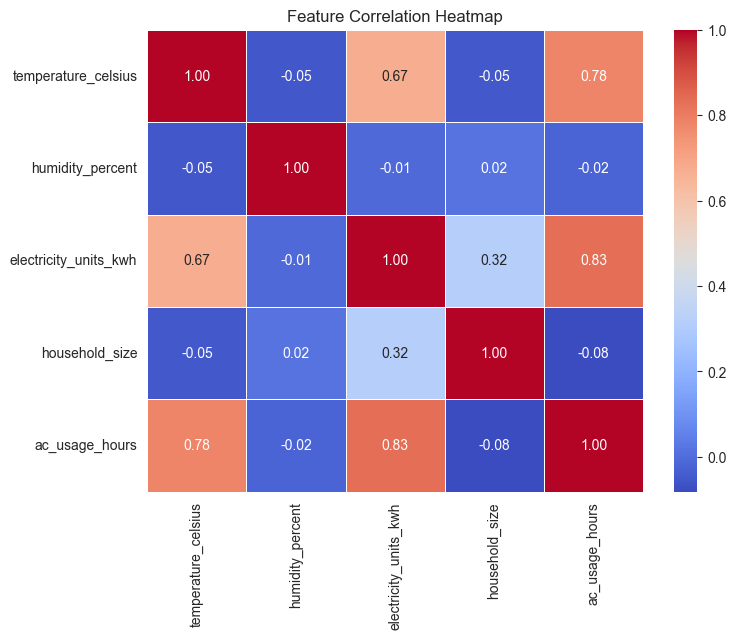

In [67]:
plt.figure(figsize=(8,6))

corr_matrix = df.corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    annot=True,          # shows correlation values
    fmt=".2f",           # 2 decimal places
    cmap="coolwarm",     # color style
    linewidths=0.5
)

plt.title("Feature Correlation Heatmap")
plt.show()

In [68]:
df.head()

,date,temperature_celsius,humidity_percent,electricity_units_kwh,household_size,ac_usage_hours,city
0,2025-01-01,15.62,73.92,26.52,6,1.90,Delhi
1,2025-01-02,16.69,57.55,22.31,6,0.20,Delhi
2,2025-01-03,20.62,88.19,23.49,5,0.04,Delhi
3,2025-01-04,10.01,67.05,20.61,3,1.98,Delhi
4,2025-01-05,16.48,66.71,12.32,3,0.58,Delhi


In [69]:
df.drop(["date","city"],axis=1,inplace=True)
df.head()


,temperature_celsius,humidity_percent,electricity_units_kwh,household_size,ac_usage_hours
0,15.62,73.92,26.52,6,1.90
1,16.69,57.55,22.31,6,0.20
2,20.62,88.19,23.49,5,0.04
3,10.01,67.05,20.61,3,1.98
4,16.48,66.71,12.32,3,0.58


In [71]:
X = df.drop("electricity_units_kwh", axis=1)
y = df["electricity_units_kwh"]


TypeError: 'Index' object is not callable

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # 20% for testing
    random_state=42     # for reproducibility
)

In [73]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (292, 4)
X_test shape: (73, 4)
y_train shape: (292,)
y_test shape: (73,)


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)


X_test = scaler.transform(X_test)


In [76]:
model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [78]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 2.452071118184375
MSE: 8.007413911173677
RMSE: 2.8297374279557594
R2 Score: 0.8277384809226583


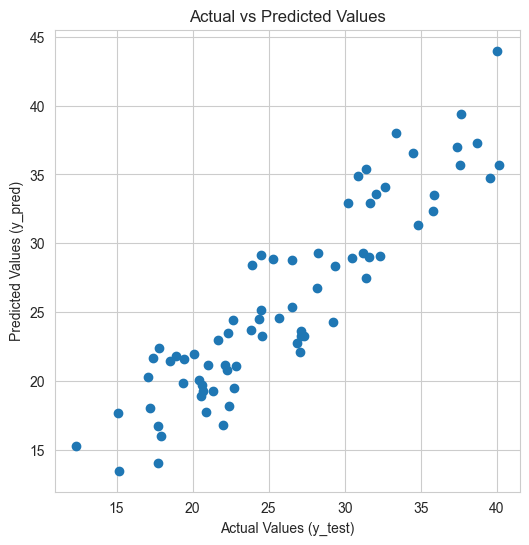

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")

plt.show()


In [80]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create model
ridge = Ridge(alpha=1.0)

# Train
ridge.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge.predict(X_test)

# Evaluate
print("Ridge R2:", r2_score(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Ridge R2: 0.828519927843078
Ridge RMSE: 2.82331172377722


In [87]:
from sklearn.linear_model import Lasso

# Create model
lasso = Lasso(alpha=0.1)

# Train
lasso.fit(X_train, y_train)

# Predict
y_pred_lasso = lasso.predict(X_test)

# Evaluate
print("Lasso R2:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


Lasso R2: 0.8319911156886624
Lasso RMSE: 2.7945901673073377


In [82]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Try multiple alpha values
alphas = np.logspace(-3, 3, 50)

ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

y_pred_ridge = ridge_cv.predict(X_test)

print("Best Alpha (Ridge):", ridge_cv.alpha_)
print("Ridge R2:", r2_score(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Best Alpha (Ridge): 0.49417133613238334
Ridge R2: 0.8281326315333646
Ridge RMSE: 2.8264982208633946


In [83]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000)

lasso_cv.fit(X_train, y_train)

y_pred_lasso = lasso_cv.predict(X_test)

print("Best Alpha (Lasso):", lasso_cv.alpha_)
print("Lasso R2:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


Best Alpha (Lasso): 0.05128829051520151
Lasso R2: 0.8301132154603018
Lasso RMSE: 2.8101648742620142


c:\Users\qashi\OneDrive\Desktop\Complete MLProj\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1682: FutureWarning: 'alphas=None' is deprecated and will be removed in 1.9, at which point the default value will be set to 100. Set 'alphas=100' to silence this warning.
  warnings.warn(


In [84]:
print("Linear R2:", r2_score(y_test, y_pred))
print("RidgeCV R2:", r2_score(y_test, y_pred_ridge))
print("LassoCV R2:", r2_score(y_test, y_pred_lasso))


Linear R2: 0.8277384809226583
RidgeCV R2: 0.8281326315333646
LassoCV R2: 0.8301132154603018


In [85]:
import pickle


with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("linear_regression.pkl", "wb") as f:
    pickle.dump(model, f)


with open("lasso_cv.pkl", "wb") as f:
    pickle.dump(lasso_cv, f)


with open("ridge_cv.pkl", "wb") as f:
    pickle.dump(ridge_cv, f)

print("All models saved successfully using pickle!")


All models saved successfully using pickle!
